In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Split the data into training and testing sets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
#warning ignore
import warnings
warnings.filterwarnings('ignore')

##Load Dataset of computer hardware performance

In [72]:
df=pd.read_csv('/content/Machine.csv')
df.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [73]:
#shape of dataset
df.shape

(208, 10)

#ATTRIBUTE INFORMATION:
   1. vendor name: 30
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)

In [74]:
# Rename columns as per instruction
df.columns = ['vendor_name', 'model_name', 'myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'prp', 'erp']

In [75]:
#check the dataset after rename of dataset
df.head()

,vendor_name,model_name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [76]:
df['vendor_name'].unique()

array(['amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d', 'cdc',
       'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould', 'hp',
       'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [77]:
#copy dataset
df1=df.copy()

In [78]:
# Check for missing values
df.isnull().sum()

,0
vendor_name,0
model_name,0
myct,0
mmin,0
mmax,0
cach,0
chmin,0
chmax,0
prp,0
erp,0


In [79]:
#check if any duplicate data
df.duplicated().sum()

0

#Exploratory Data Analysis (EDA)

In [80]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  208 non-null    object
 1   model_name   208 non-null    object
 2   myct         208 non-null    int64 
 3   mmin         208 non-null    int64 
 4   mmax         208 non-null    int64 
 5   cach         208 non-null    int64 
 6   chmin        208 non-null    int64 
 7   chmax        208 non-null    int64 
 8   prp          208 non-null    int64 
 9   erp          208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [81]:
# Summary statistics
df.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


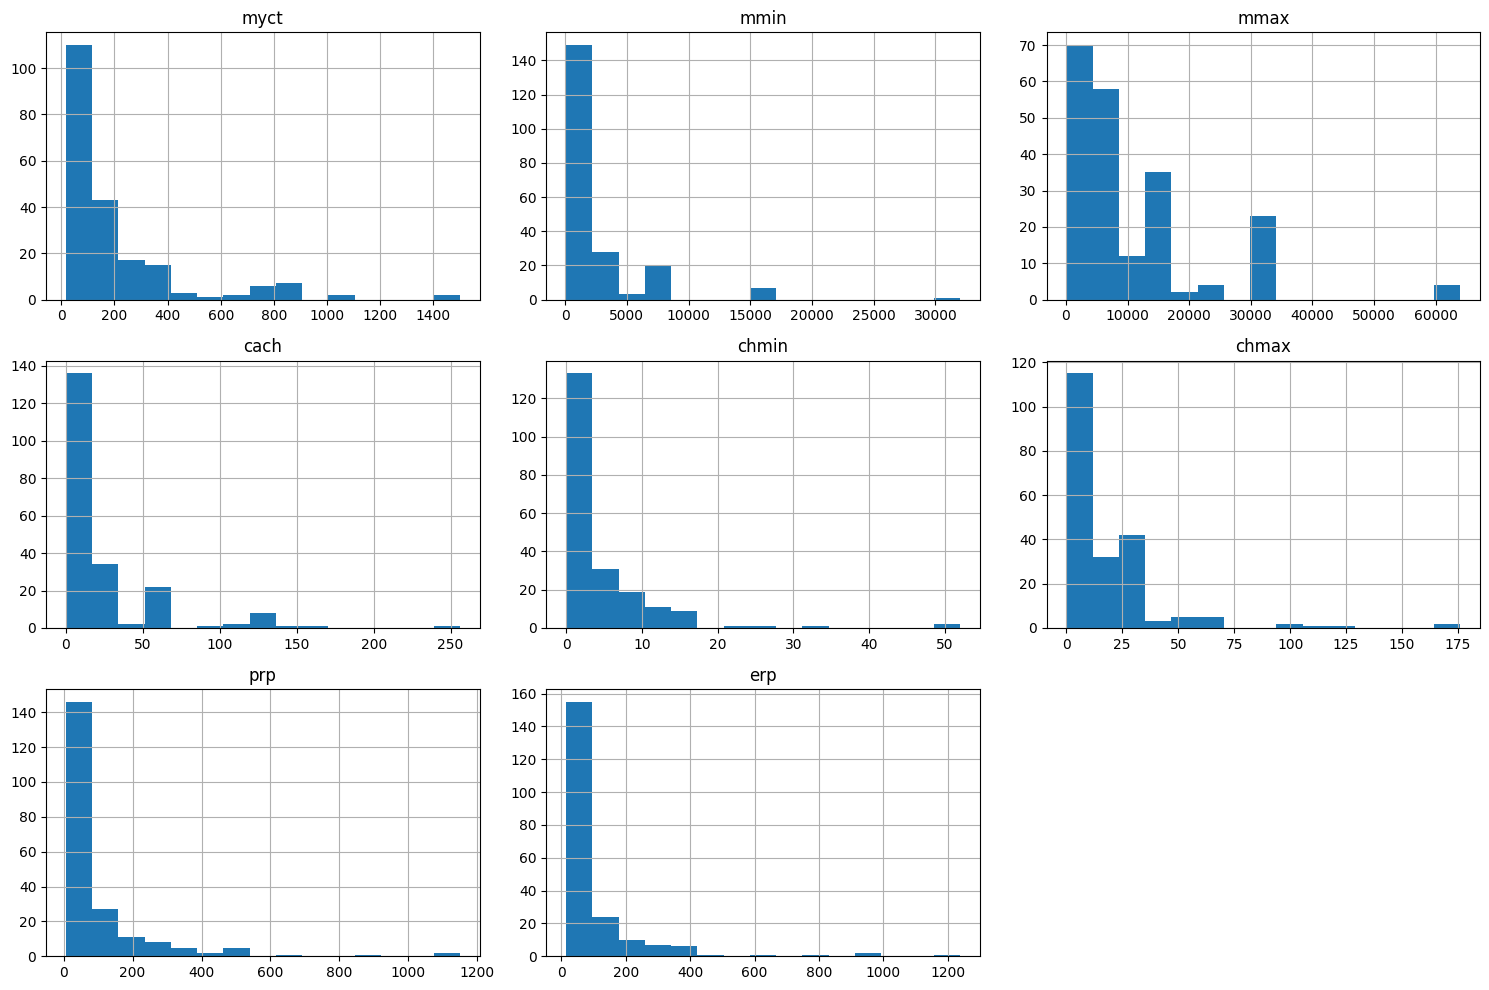

In [82]:
# Distribution of numerical features
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

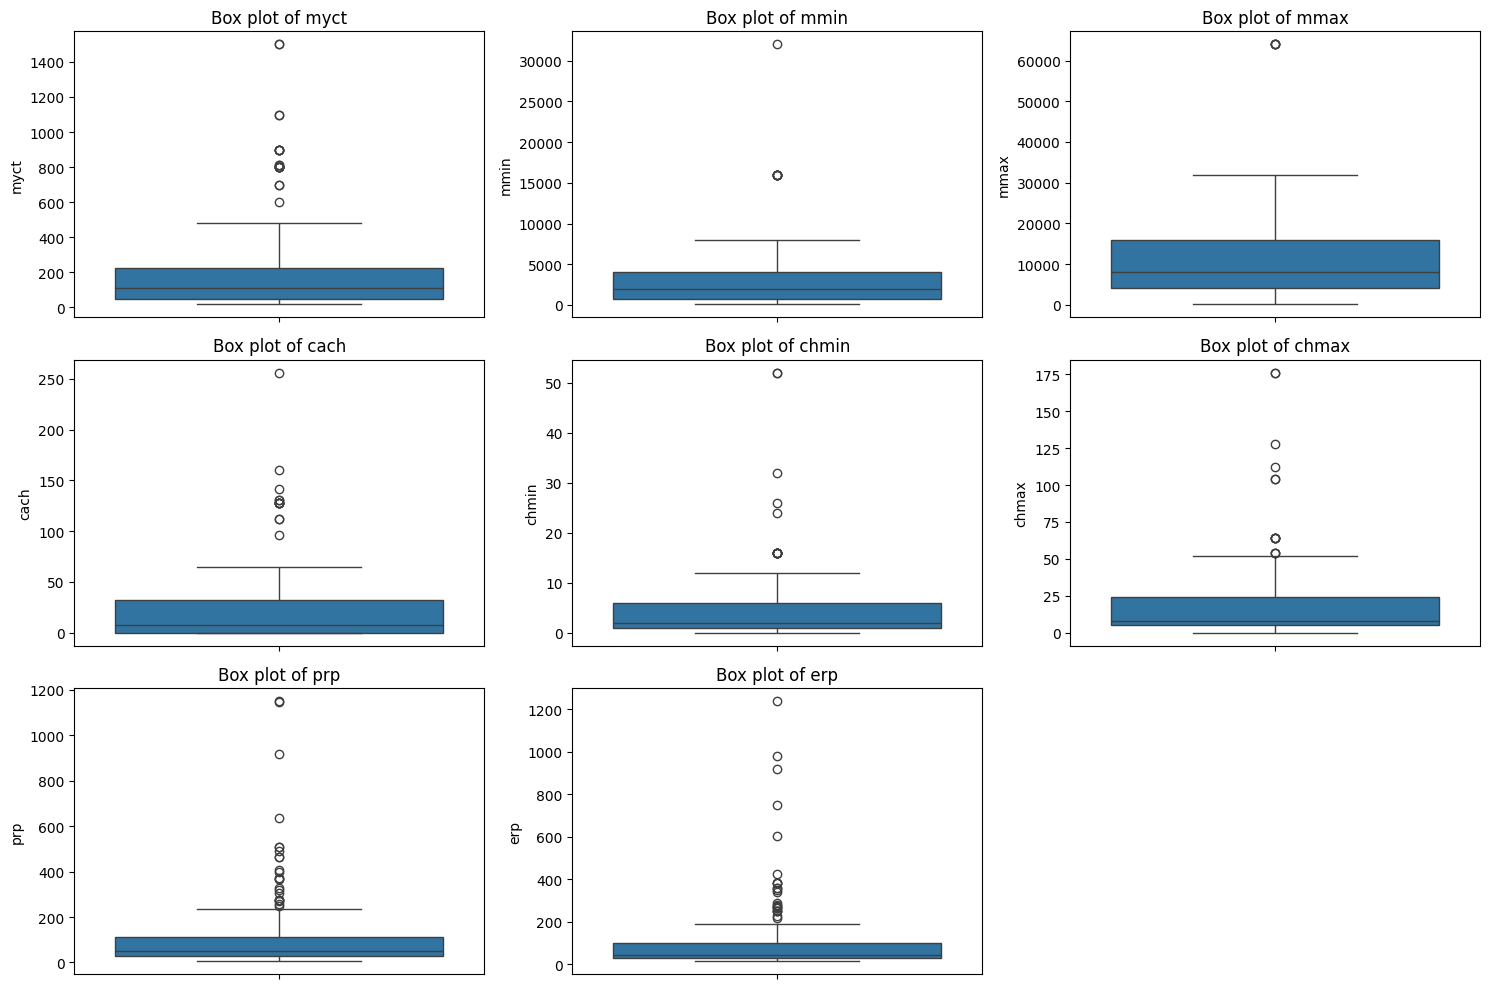

In [83]:
# Box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(int).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

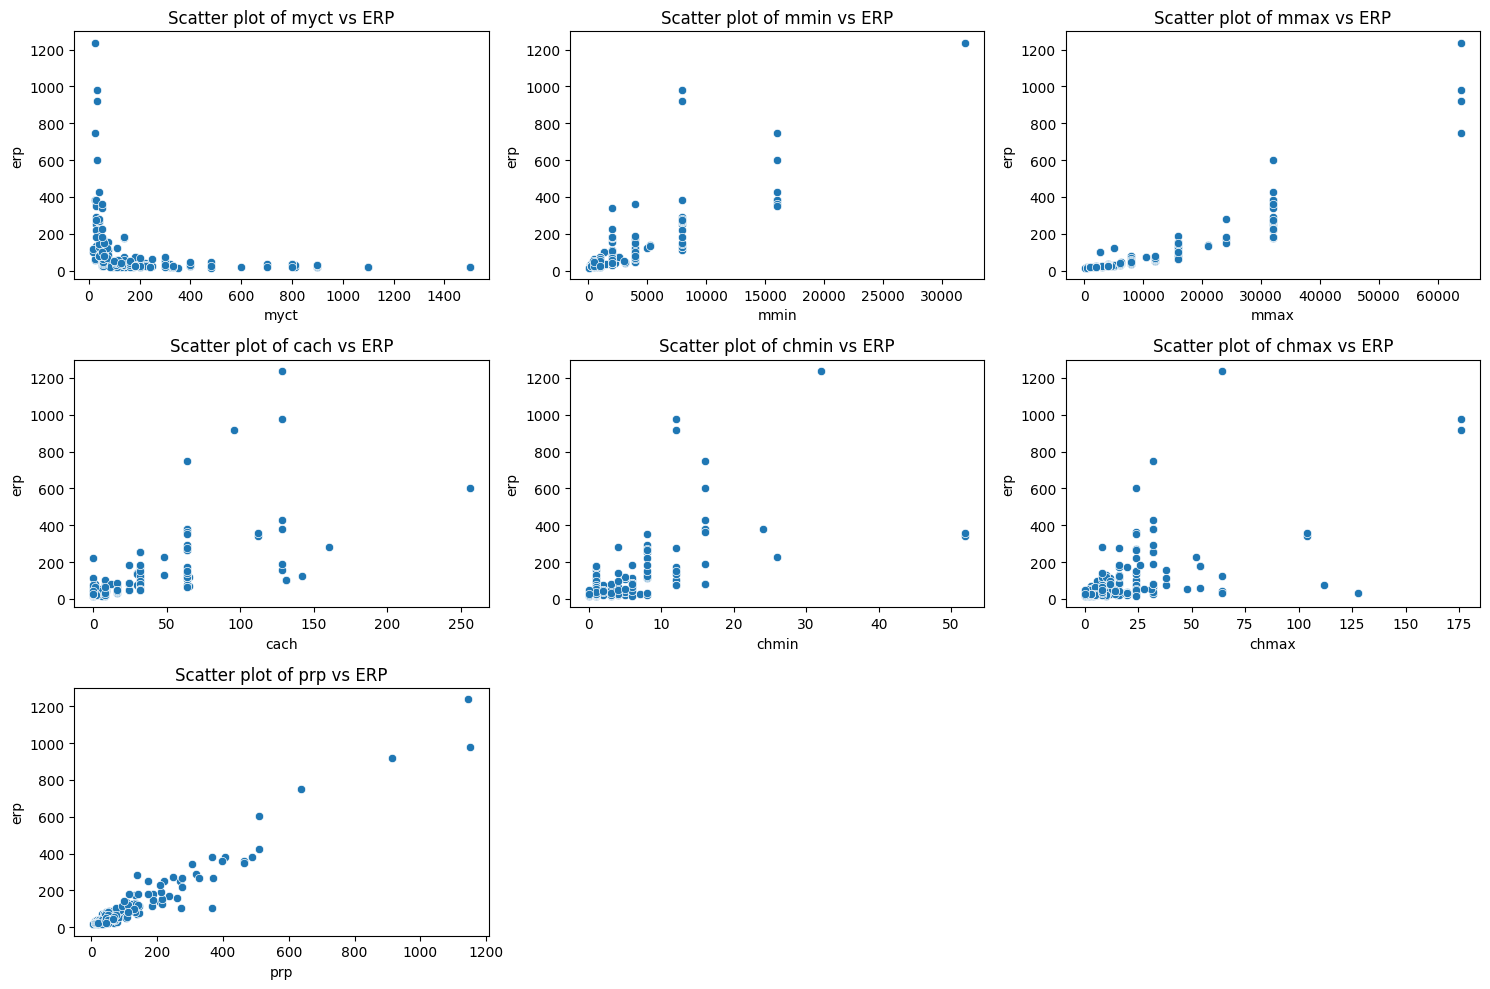

In [84]:
# Relationship between features and target variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(int).columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[column], y=df['erp'])
    plt.title(f'Scatter plot of {column} vs ERP')
plt.tight_layout()
plt.show()

In [85]:
# Convert vendor_name and model_name to categorical codes
df1['vendor_name'] = df1['vendor_name'].astype('category').cat.codes
df1['model_name'] = df1['model_name'].astype('category').cat.codes

In [86]:
df1['vendor_name'].unique()

array([ 0,  1,  2,  3,  4,  5,  7,  6,  8,  9, 10, 11, 12, 15, 13, 14, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int8)

#Correlation analysis

In [87]:
# Correlation matrix of
df1.corr()

,vendor_name,model_name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
vendor_name,1.000000,-0.142223,-0.084355,-0.091465,0.003136,0.070564,0.055215,0.032608,-0.015946,-0.013867
model_name,-0.142223,1.000000,0.046058,-0.131657,-0.179800,-0.001351,-0.209373,-0.134045,-0.189599,-0.177713
myct,-0.084355,0.046058,1.000000,-0.337071,-0.379592,-0.340414,-0.300734,-0.255629,-0.306571,-0.287806
mmin,-0.091465,-0.131657,-0.337071,1.000000,0.757827,0.602788,0.526665,0.293877,0.798310,0.823113
mmax,0.003136,-0.179800,-0.379592,0.757827,1.000000,0.600680,0.568594,0.562388,0.865576,0.904180
cach,0.070564,-0.001351,-0.340414,0.602788,0.600680,1.000000,0.588128,0.423550,0.704642,0.687428
chmin,0.055215,-0.209373,-0.300734,0.526665,0.568594,0.588128,1.000000,0.541762,0.608841,0.610094
chmax,0.032608,-0.134045,-0.255629,0.293877,0.562388,0.423550,0.541762,1.000000,0.621309,0.606281
prp,-0.015946,-0.189599,-0.306571,0.798310,0.865576,0.704642,0.608841,0.621309,1.000000,0.966423
erp,-0.013867,-0.177713,-0.287806,0.823113,0.904180,0.687428,0.610094,0.606281,0.966423,1.000000


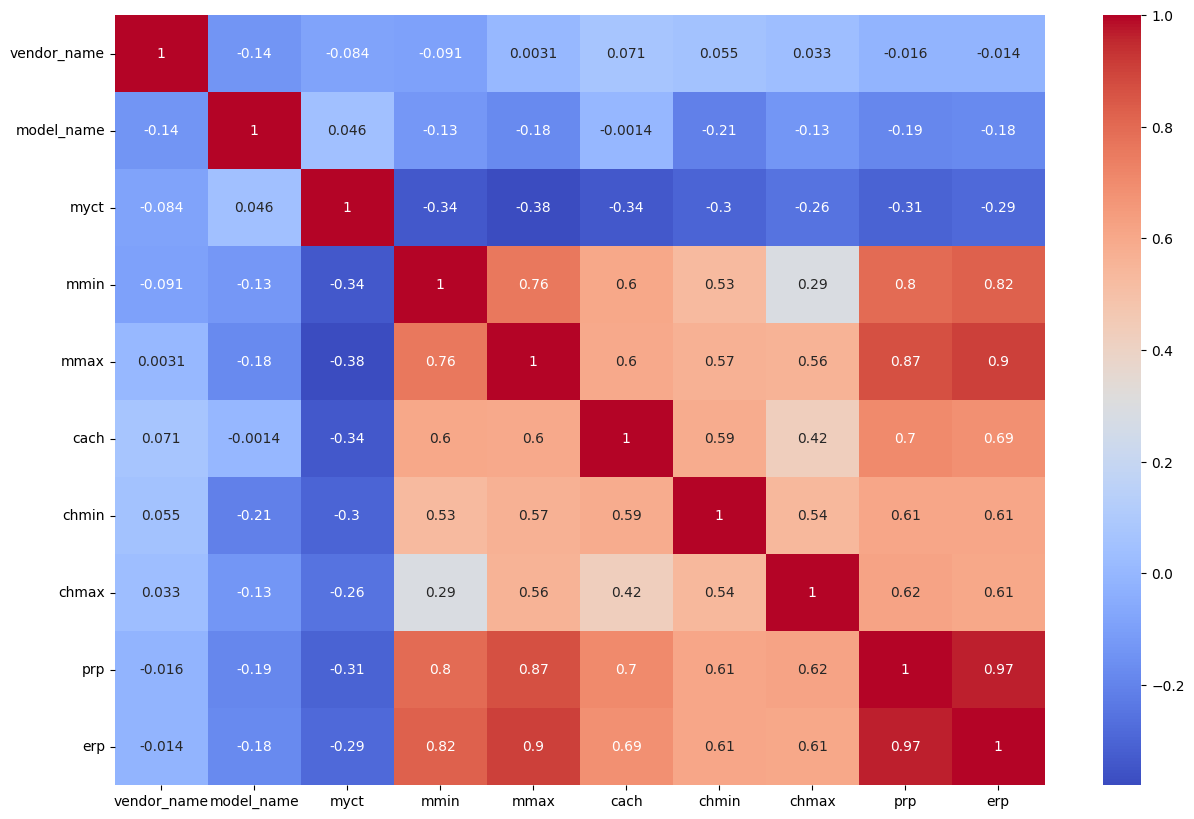

In [88]:
#correlation matrix display
plt.figure(figsize=(15, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

<Figure size 1200x600 with 0 Axes>

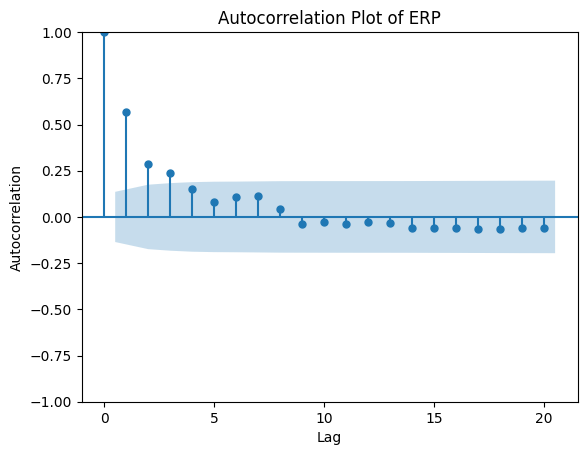

In [104]:
#Check Autocorrelation:
from statsmodels.graphics.tsaplots import plot_acf
# Plot autocorrelation for the ERP column
plt.figure(figsize=(12, 6))
plot_acf(df['erp'], lags=20)  # Adjust the number of lags as needed
plt.title('Autocorrelation Plot of ERP')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

##Splitting data

In [89]:
# Define features and target
X = df1.drop('erp', axis=1)
y = df1['erp']

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((166, 9), (42, 9), (166,), (42,))

#Build model & Train model

In [91]:
# Define models to be evaluated
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Support Vector Regression": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

In [92]:
# Dictionary to store evaluation results
results = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store the results
    results[name] = {
        "R2 Score": r2,
        "MSE": mse,
        "MAE": mae
    }

#Evaluate model

In [93]:
# Print the evaluation results
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

Model: Linear Regression
R2 Score: 0.9052144423169944
MSE: 2757.013760598391
MAE: 30.248491096791646


Model: Decision Tree
R2 Score: 0.9528898631302308
MSE: 1370.2857142857142
MAE: 16.142857142857142


Model: Random Forest
R2 Score: 0.9480203254534488
MSE: 1511.9252499999996
MAE: 16.260238095238098


Model: Support Vector Regression
R2 Score: 0.019073340312329323
MSE: 28532.071393631824
MAE: 67.41488871610105


Model: K-Neighbors Regressor
R2 Score: 0.9042349276383351
MSE: 2785.5047619047623
MAE: 23.523809523809526


Model: AdaBoost Regressor
R2 Score: 0.9248621368733727
MSE: 2185.5241204031186
MAE: 29.442989005871034


Model: Gradient Boosting Regressor
R2 Score: 0.9542116056148003
MSE: 1331.8403824545455
MAE: 14.565455185423895


Model: XGBoost Regressor
R2 Score: 0.9445210788865318
MSE: 1613.7073270647493
MAE: 16.855070522853307




#Find the Best model among all

In [96]:
# Find the best model based on R2 Score
best_model_name = max(results, key=lambda k: results[k]['R2 Score'])
print(f"Best Model: {best_model_name} \nR2 Score: {results[best_model_name]['R2 Score']}")

Best Model: Gradient Boosting Regressor 
R2 Score: 0.9542116056148003


##saving Model/export the model

In [101]:
from joblib import dump,load
dump(best_model_name,'Best_model.joblib')

['Best_model.joblib']

##Conclusion:-
 Write a conclusion summarizing the results, including the best model's performance metrics, and provide deployment instructions for the saved model. The deployment instructions include loading the model, preprocessing new input data, and making predictions.